In [17]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

In [30]:
samp_fits = fits.open('data/oap_HP_0.fits')
samp_fits[0].header

 [astropy.io.fits.verify]


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  256 / length of data axis 1                          
NAXIS2  =                  256 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BUNIT   = 'nm      '           / OPD units                                      
PUPLSCAL=           0.00015625 / pixel scale [m/pix]                            
PIXSCALE=           0.00015625 / pixel scale [m/pix]                            
OPTICD  =                 0.04 / Optic diameter [m]                             
ALPHA   =                 1.

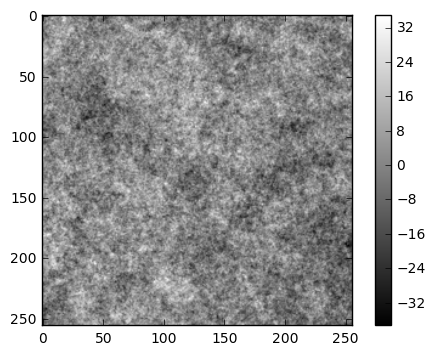

In [29]:
plt.imshow(samp_fits[0].data, cmap='gray')
plt.colorbar()

In [48]:
pupil = fits.open('data/MagAOX_f11_pupil_256_unmasked.fits')
pupil.info()

Filename: data/MagAOX_f11_pupil_256_unmasked.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      13   (256, 256)   float32   


In [49]:
pupil[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  256 / length of data axis 1                          
NAXIS2  =                  256 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
PUPLSCAL=           0.02539062 / pixel scale [m/pixel]                          
PUPILD  =                  6.5 / Physical diameter of pupil image [m]           
SPIDERHW=              0.01905 / Half-width of spiders [m]                      
HIERARCH CENOBSRAT =      0.29 / central obscuration ratio                      
OMASKRAT=                   

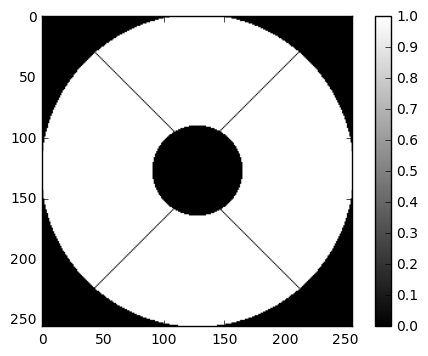

In [33]:
plt.imshow(pupil[0].data, cmap='gray')
plt.colorbar()

In [46]:
pupilmasked = fits.open('data/MagAOX_f11_pupil_400_masked.fits')
pupilmasked[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  400 / length of data axis 1                          
NAXIS2  =                  400 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
PUPLSCAL=              0.01625 / pixel scale [m/pixel]                          
PUPILD  =                  6.5 / Physical diameter of pupil image [m]           
SPIDERHW=                0.068 / Half-width of spiders [m]                      
HIERARCH CENOBSRAT =      0.31 / central obscuration ratio                      
OMASKRAT=                0.9

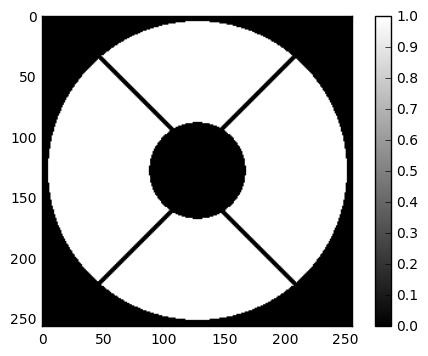

In [44]:
plt.imshow(pupilmasked[0].data, cmap='gray')
plt.colorbar()

In [34]:
m1 = fits.open('data/ClayM1_0mask_meters.fits')
m1.info()

Filename: data/ClayM1_0mask_meters.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       6   (233, 233)   float32   


In [35]:
m1[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.8          
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  233 /                                                
NAXIS2  =                  233 /                                                
EXTEND  =                    T /Extensions may be present                       

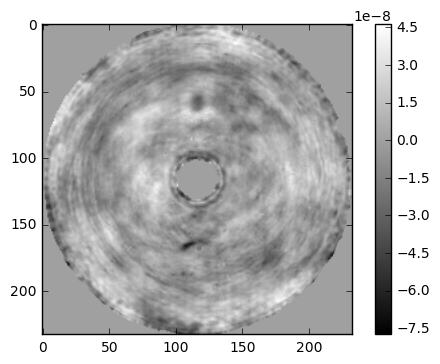

In [36]:
plt.imshow(m1[0].data, cmap='gray')
plt.colorbar()

In [37]:
puplscal = 6.5/m1[0].shape[0]
m1[0].header.set('PUPLSCAL', puplscal)

In [41]:
m1.writeto('data/ClayM1_0mask_meters_puplscal.fits')

In [42]:
m1[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.8          
BITPIX  =                  -32 /                                                
NAXIS   =                    2 /                                                
NAXIS1  =                  233 /                                                
NAXIS2  =                  233 /                                                
EXTEND  =                    T /Extensions may be present                       
PUPLSCAL=  0.02789699570815451                                                  